In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [3]:
#load csv
final = ("../ClippersScripts_ha/final_df.csv")
salary = ("../ClippersScripts_ha/Players_Salaries.xlsx")

final_df = pd.read_csv(final)
salary_df = pd.read_excel(salary)
salary_2015_df = pd.read_excel(salary, sheet_name='2015')
salary_2016_df = pd.read_excel(salary, sheet_name='2016')
salary_2017_df = pd.read_excel(salary, sheet_name='2017')
salary_2018_df = pd.read_excel(salary, sheet_name='2018')
salary_2019_df = pd.read_excel(salary, sheet_name='2019')

In [4]:
#create data frame for highest paid players of all 4 teams
highest_paid_df = final_df.loc[final_df['SALARY'] >= 20000000]
highest_paid_df

,YEAR,PLAYER,POSITION,TEAM,SALARY,AGE,GP,W,L,MIN,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
25,2016,Kevin Durant,SF,Golden State Warriors,26540100,28,62,51,11,33.4,...,4.8,2.2,1.1,1.6,1.9,48.0,23,1,11.5,5
34,2017,Stephen Curry,PG,Golden State Warriors,37457154,30,51,41,10,32.0,...,6.1,3.0,1.6,0.2,2.2,43.8,5,0,9.5,1
48,2018,Stephen Curry,PG,Golden State Warriors,37457154,31,69,52,17,33.8,...,5.2,2.8,1.3,0.4,2.4,43.8,3,0,10.0,1
53,2018,Kevin Durant,SF,Golden State Warriors,30000000,30,78,54,24,34.6,...,5.9,2.9,0.7,1.1,2.0,45.0,16,2,8.4,11
65,2019,D'Angelo Russell,SG,Golden State Warriors,27285000,23,23,6,17,31.5,...,6.0,3.0,0.8,0.3,2.1,37.4,0,0,-6.0,32
74,2019,Stephen Curry,PG,Golden State Warriors,40231758,31,4,1,3,28.0,...,6.5,3.8,1.3,0.5,2.5,37.5,1,0,-8.0,1
81,2015,Kobe Bryant,SF,Los Angeles Lakers,25000000,37,66,13,53,28.2,...,2.8,2.0,0.9,0.2,1.7,27.7,2,0,-8.6,1
113,2017,Brook Lopez,C,Los Angeles Lakers,22642650,30,74,34,40,23.4,...,1.7,1.3,0.4,1.3,2.6,24.2,4,0,-1.1,28
127,2018,LeBron James,SF,Los Angeles Lakers,35654150,34,55,28,27,35.2,...,8.3,3.6,1.3,0.6,1.7,52.0,32,8,2.1,3
144,2019,Anthony Davis,PF,Los Angeles Lakers,27093018,26,35,29,6,35.2,...,3.2,2.4,1.5,2.6,2.5,53.2,17,0,5.9,37


The r-squared is: 0.6739932147621188


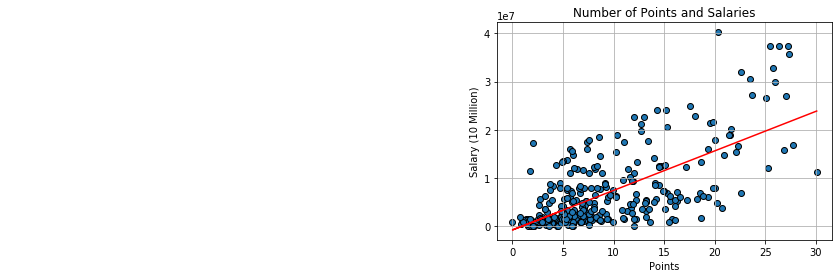

In [7]:
x_pts = final_df['PTS']
y_sal = final_df['SALARY']
plt.scatter(x_pts,y_sal,marker = 'o',edgecolors = 'black')
plt.title("Number of Points and Salaries")
plt.xlabel("Points")
plt.ylabel("Salary (10 Million)")
plt.grid()
plt.yticks(np.arange(0,50000000,10000000))
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_pts, y_sal)
regress_values = x_pts * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_pts,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

In [5]:
#export file into csv
highest_paid_df.to_csv("highest_pd.csv",index=False, header=True)

In [20]:
# #check correlation of stats vs. salary per highest_paid and save into CSV 
# highest_paid_df_corr = highest_paid_df.corr()
# corr_highest_paid_df = highest_paid_df_corr.unstack().sort_values()
# corr_highest_paid_df.to_csv('highest_paid_corr.csv', header=True)


NameError: name 'highest_paid_df' is not defined